In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

Training a Model
================

We begin by loading in a standard data set (Iris) and training a Boolean classifier.

For each row we will be asking the question, Is this a versicolor iris?

We will be using the Xgboost gbtree classifier for this experiment.

In [15]:
# Load data

data = load_iris()
target = np.where(data["target"] == 1, data["target"], 0)
data_train, data_test, target_train, target_test = train_test_split(data["data"], target, random_state=1000)

In [16]:
# Train classifier and score testing data.

model = XGBClassifier()
model.fit(data_train, target_train)
results = model.predict_proba(data_test)[:,1]
results

array([0.96320266, 0.00751847, 0.07289541, 0.00707366, 0.00751847,
       0.00751847, 0.7703747 , 0.9886048 , 0.00751847, 0.10042603,
       0.00707366, 0.9806999 , 0.00751847, 0.00751847, 0.00707366,
       0.98864824, 0.9025391 , 0.98864824, 0.00751847, 0.00751847,
       0.9708713 , 0.06193166, 0.00707366, 0.01296465, 0.89187235,
       0.05073759, 0.96396726, 0.9785469 , 0.89187235, 0.00707366,
       0.00751847, 0.9891939 , 0.00707366, 0.9605656 , 0.00751847,
       0.00889234, 0.00889234, 0.954209  ], dtype=float32)

Margins
------

Each score from XGBoost is actually a linear score (-inf, inf) that is normalized to a probability when requested. 

Essentially each tree in the forest generates a number (margin) which is summed across the whole forest to create the final output of the model. 

We can access these margins through XGBoost directly

In [4]:
margin = model.predict(data_test, output_margin=True)
margin

array([ 3.2648377, -4.8828454, -2.5430408, -4.944279 , -4.8828454,
       -4.8828454,  1.2104284,  4.4631042, -4.8828454, -2.1924999,
       -4.944279 ,  3.9281557, -4.8828454, -4.8828454, -4.944279 ,
        4.466969 ,  2.22576  ,  4.466969 , -4.8828454, -4.8828454,
        3.5064716, -2.7177913, -4.944279 , -4.3324795,  2.1100106,
       -2.9290183,  3.28663  ,  3.820199 ,  2.1100106, -4.944279 ,
       -4.8828454,  4.5167837, -4.944279 ,  3.1928854, -4.8828454,
       -4.713633 , -4.713633 ,  3.0367954], dtype=float32)

In [5]:
# Summarize prediction Results

dfResults = pd.DataFrame(data_test)
dfResults.columns = data["feature_names"]
dfResults["versicolor_prob"] = results
dfResults["versicolor_margin"] = margin
dfResults

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),versicolor_prob,versicolor_margin
0,5.7,3.0,4.2,1.2,0.963203,3.264838
1,4.9,3.1,1.5,0.2,0.007518,-4.882845
2,6.1,3.0,4.9,1.8,0.072895,-2.543041
3,6.9,3.2,5.7,2.3,0.007074,-4.944279
4,4.8,3.4,1.9,0.2,0.007518,-4.882845
5,5.2,3.4,1.4,0.2,0.007518,-4.882845
6,5.4,3.0,4.5,1.5,0.770375,1.210428
7,6.2,2.2,4.5,1.5,0.988605,4.463104
8,4.4,3.0,1.3,0.2,0.007518,-4.882845
9,6.3,2.7,4.9,1.8,0.100426,-2.192500


Now let's try to explain some of these values.

SHAP - Shapley Value
====

SHAP attempts to determine which features were responsible for which portion of the margin.

SHAP is originally a concept from cooperative game theory. It attempts to divide value amount a group of cooperative workers according to the following axioms.

- All value is assigned to at least one actor.
- Two actors who contribute equally receive equal value.
- Actors who provide no value receive no value.
- And a few other math technicalities.

In short, SHAP divides up the margin and tries to determine how much of it each feature is responsible for.

In [6]:
# Generate shap data

explainer = shap.TreeExplainer(model, data=data_train)
shap_values = explainer.shap_values(data_test)

In [7]:
explainer.expected_value

-1.9739456095867354

Firstly, it's important to understand that the SHAP library always makes reference to the model's expected value.

The expected value is roughly equal to the average output of the model given random data.

Since there were a lot more examples in the training data that are not versicolor it makes sense that the expected value is negative. Given a random example the output is less
likely to be versicolor.

Individual SHAP values always sum up to a predictions "shift", the difference between the margin and the model's expected value.

In [8]:
# Combine everything into a formatted dataframe.

dfShaps = pd.DataFrame(shap_values)
dfShaps.columns = [i + "_shap" for i in data["feature_names"]]
dfJoined = pd.merge(dfResults, dfShaps, left_index=True, right_index=True)
dfJoined["shift"] = dfJoined["versicolor_margin"].apply(lambda x: x - explainer.expected_value)
dfJoined["target"] = target_test
dfJoined = dfJoined[["sepal length (cm)", "sepal length (cm)_shap", "sepal width (cm)", "sepal width (cm)_shap", "petal length (cm)", "petal length (cm)_shap", "petal width (cm)", "petal width (cm)_shap", "versicolor_margin", "shift", "versicolor_prob", "target"]]
dfJoined

,sepal length (cm),sepal length (cm)_shap,sepal width (cm),sepal width (cm)_shap,petal length (cm),petal length (cm)_shap,petal width (cm),petal width (cm)_shap,versicolor_margin,shift,versicolor_prob,target
0,5.7,0.501579,3.0,-0.189640,4.2,3.390318,1.2,1.536527,3.264838,5.238783,0.963203,1
1,4.9,-1.156353,3.1,-0.213217,1.5,-2.139689,0.2,0.600361,-4.882845,-2.908900,0.007518,0
2,6.1,0.878357,3.0,-0.110606,4.9,1.669710,1.8,-3.006556,-2.543041,-0.569095,0.072895,0
3,6.9,0.575064,3.2,-0.104189,5.7,-1.293505,2.3,-2.147703,-4.944279,-2.970334,0.007074,0
4,4.8,-1.156353,3.4,-0.213217,1.9,-2.139689,0.2,0.600361,-4.882845,-2.908900,0.007518,0
5,5.2,-1.156353,3.4,-0.213217,1.4,-2.139689,0.2,0.600361,-4.882845,-2.908900,0.007518,0
6,5.4,-1.158485,3.0,-0.189640,4.5,3.075060,1.5,1.457439,1.210428,3.184374,0.770375,1
7,6.2,0.970568,2.2,0.577342,4.5,3.285362,1.5,1.603780,4.463104,6.437050,0.988605,1
8,4.4,-1.156353,3.0,-0.213217,1.3,-2.139689,0.2,0.600361,-4.882845,-2.908900,0.007518,0
9,6.3,0.892239,2.7,0.487395,4.9,1.683188,1.8,-3.281377,-2.192500,-0.218554,0.100426,0


Now let's take a look at row 9 and attempt to use SHAP to explain why it is not a versicolor.

In [9]:
dfJoined.iloc[9:10]

,sepal length (cm),sepal length (cm)_shap,sepal width (cm),sepal width (cm)_shap,petal length (cm),petal length (cm)_shap,petal width (cm),petal width (cm)_shap,versicolor_margin,shift,versicolor_prob,target
9,6.3,0.892239,2.7,0.487395,4.9,1.683188,1.8,-3.281377,-2.1925,-0.218554,0.100426,0


In [1]:
dfJoined.to_csv('out.csv',index=False)

NameError: name 'dfJoined' is not defined

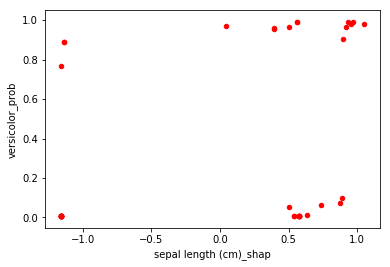

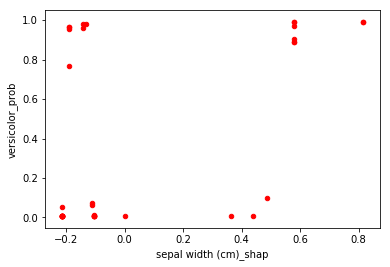

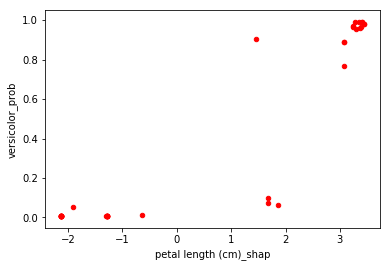

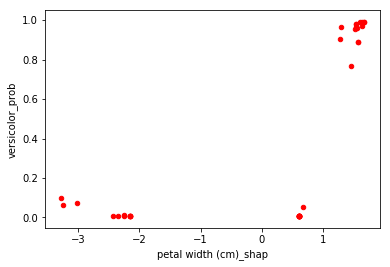

In [11]:
dfJoined.plot(kind='scatter',x='sepal length (cm)_shap',y='versicolor_prob',color='red')
plt.show()

dfJoined.plot(kind='scatter',x='sepal width (cm)_shap',y='versicolor_prob',color='red')
plt.show()

dfJoined.plot(kind='scatter',x='petal length (cm)_shap',y='versicolor_prob',color='red')
plt.show()

dfJoined.plot(kind='scatter',x='petal width (cm)_shap',y='versicolor_prob',color='red')
plt.show()

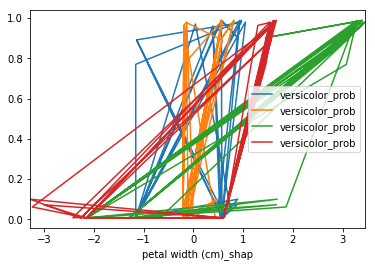

In [12]:
# gca stands for 'get current axis'
ax = plt.gca()

dfJoined.plot(kind='line',x='sepal length (cm)_shap',y='versicolor_prob',ax=ax)
dfJoined.plot(kind='line',x='sepal width (cm)_shap',y='versicolor_prob',ax=ax)
dfJoined.plot(kind='line',x='petal length (cm)_shap',y='versicolor_prob',ax=ax)
dfJoined.plot(kind='line',x='petal width (cm)_shap',y='versicolor_prob' ,ax=ax)

plt.show()

In [13]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[9], data["feature_names"])

This predictions shift is only slightly negative. So the features did not provide enough evidence that this sample is a versicolor. Most of the individual SHAP values are actually positive and provides a lot of evidence in favor of versicolor. However, the petal width is a strong exception and counteracts this evidence. The model concludes that there is not enough evidence for it to conclude that it's default prediction of not versicolor is wrong and maintains that prediction.

If we wanted to point at specific features we could say that the petal width is our primary reason for not labeling this flower a versicolor iris.

Downsides and Gotchas
=====

- Unlike lime SHAP cannot tell us if a number is too small or too big.
    - All we can tell from the above is that a petal width of 1.8 cm is a strong indicator that an iris is not versicolor. 
    - We would need to look at context to determine what would have to change about the petal to change the prediction.
- SHAP assumes that all input features are independent and not correlated.
    - If two features are directly correlated then the actual SHAP value for that feature is the sum of the two correlated features.
    - Likewise partially correlated features can interfere with each other and cause SHAP to under / over estimate the importance of one over the other.

Final Thoughts
===

Models are only as explainable as their least explainable parts. 

SHAP cannot help us if we choose to perform some complicated transformation on top of the margins which breaks their linearity.

SHAP cannot help us if our features themselves are not explainable (ie generated through AUTOML or some other black box process). 

If the model builder doesn't know what a feature means, then what hope does SHAP.